In [8]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obj = wave.open("test2.wav", "rb")

In [4]:
print("number of channels", obj.getnchannels())
print("sample width", obj.getsampwidth())
print("frame rate", obj.getframerate())
print("number of frames", obj.getnframes())
print("parameters", obj.getparams())

number of channels 2
sample width 2
frame rate 48000
number of frames 344742
parameters _wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=344742, comptype='NONE', compname='not compressed')


In [6]:
t_audio = obj.getnframes() / obj.getframerate()
print(t_audio)
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames))
obj.close()

7.182125
<class 'bytes'> <class 'int'>
1378968


In [23]:
obj_new = wave.open("test2_new.wav", "rb")
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(16000.0)
obj_new.writeframes(frames) 
obj_new.close()

EOFError: 

In [24]:
obj_new = wave.open("test2_new.wav", "wb")
sample_freq = obj_new.getframerate()
n_samples = obj_new.getnframes()
signal_wave = obj_new.readframes(-1)
obj_new.close()

t_audio = n_samples / sample_freq 
print(t_audio)

Error: frame rate not set

In [25]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

In [26]:
times = np.linspace(0, t_audio, num=n_samples)

ValueError: x and y must have same first dimension, but have shapes (344742,) and (0,)

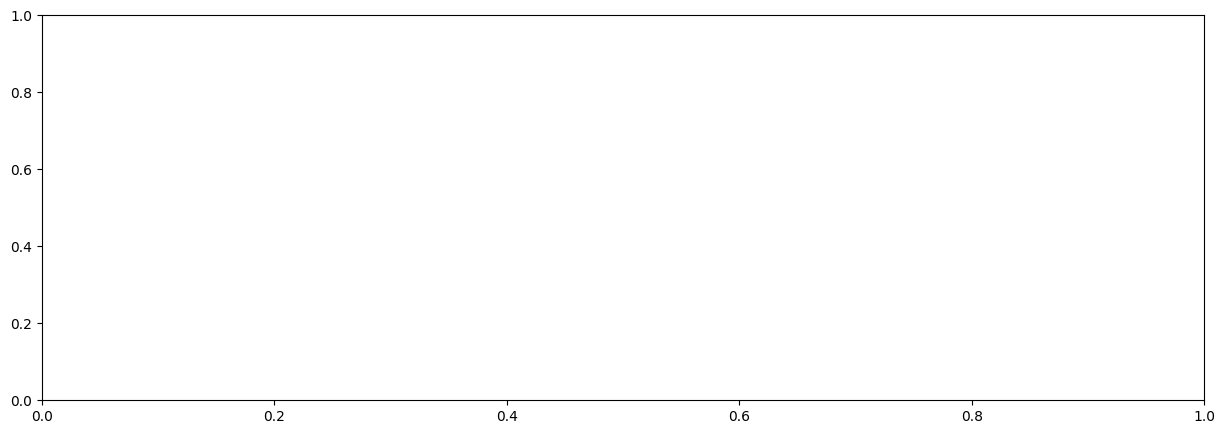

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title("Audio signal")
plt.ylabel("Signal wave")
plt.xlabel("Time in seconds")
plt.xlim(0, t_audio)
plt.show()

In [28]:
import pyaudio

In [36]:
Frames_per_buffer = 3200
Format = pyaudio.paInt16
Channels = 1 
Rate = 16000
p = pyaudio.PyAudio()
stream = p.open(
    format=Format,
    channels=Channels,
    rate=Rate,
    input=True,
    frames_per_buffer=Frames_per_buffer  
)
print("start recording")
seconds = 5
frames = []
for i in range(0, int(Rate/Frames_per_buffer*seconds)):
    data = stream.read(Frames_per_buffer)
    frames.append(data)
    
stream.stop_stream()
stream.close()
p.terminate()

obj = wave.open("dog.wav", "wb")
obj.setnchannels(Channels)
obj.setsampwidth(p.get_sample_size(Format))
obj.setframerate(Rate)
obj.writeframes(b"".join(frames))
obj.close()

start recording


In [33]:
# it worked 

In [ ]:
# can also use Pydub 